# MobileNet

## Setup

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/My\ Drive/Colab\ Notebooks/Final\ Project/project_model/images-final.zip &> /dev/null


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import keras.models
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image,image_dataset_from_directory
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.callbacks import ReduceLROnPlateau
#from keras.applications import MobileNet
import os
import matplotlib.pyplot as plt
from keras.models import Sequential
%matplotlib inline

Test the input image

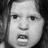

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('train/angry/10002.jpg')
img

Preprocess the input images.
Enable training, validation and testing data to fit in the model


Adapted from DEEPLIZARD website

In [ ]:
labels = os.listdir('train')

train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input).flow_from_directory(directory='train', 
                                                                                                                                 target_size=(224,224), 
                                                                                                                                 classes=labels, 
                                                                                                                                 batch_size=100)

validate_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet.preprocess_input).flow_from_directory(directory='validation', 
                                                                                                                                    target_size=(224,224), 
                                                                                                                                    classes=labels, 
                                                                                                                                    batch_size=100)



Found 20725 images belonging to 7 classes.
Found 2000 images belonging to 7 classes.


Get base_model of MoblieNet from keras

In [ ]:
base_model = tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3))
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

Set up l2 value

In [ ]:
alpha = 1e-5

Import `matplotlib` and create a helper function to plot graphs:


In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '') 
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

Set for callback and reducer

In [ ]:
checkpointer=keras.callbacks.ModelCheckpoint("MobileNet.h5_1")
earlystopper=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reducer=ReduceLROnPlateau(factor=np.sqrt(.1),
                         patience=5,re
                         verbose=1)

## Plain Model

In [ ]:
x = base_model.layers[-1].output
output = Dense(units=7, activation='softmax')(x)

In [ ]:
model_mobnet = Model(inputs=base_model.input, outputs=output)

In [ ]:
model_mobnet.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
model_mobnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
for layer in model_mobnet.layers[:-1]:
    layer.trainable = False

In [ ]:
history = model_mobnet.fit(x=train_batches,
            validation_data=validate_batches,
            epochs=30,
            verbose=1
)

Epoch 1/30
208/208 [==============================] - 33s 150ms/step - loss: 1.8648 - accuracy: 0.5768 - val_loss: 1.7963 - val_accuracy: 0.4520
Epoch 2/30
208/208 [==============================] - 30s 146ms/step - loss: 1.6020 - accuracy: 0.7607 - val_loss: 1.7497 - val_accuracy: 0.4200
Epoch 3/30
208/208 [==============================] - 30s 145ms/step - loss: 1.3801 - accuracy: 0.7659 - val_loss: 1.6154 - val_accuracy: 0.4615
Epoch 4/30
208/208 [==============================] - 30s 146ms/step - loss: 1.1884 - accuracy: 0.7767 - val_loss: 1.6167 - val_accuracy: 0.4130
Epoch 5/30
208/208 [==============================] - 30s 146ms/step - loss: 1.0363 - accuracy: 0.7774 - val_loss: 1.5443 - val_accuracy: 0.4680
Epoch 6/30
208/208 [==============================] - 30s 145ms/step - loss: 0.9175 - accuracy: 0.7800 - val_loss: 1.5646 - val_accuracy: 0.4390
Epoch 7/30
208/208 [==============================] - 30s 145ms/step - loss: 0.8289 - accuracy: 0.7813 - val_loss: 1.6456 - val_ac

In [ ]:
train_loss, train_acc = model_mobnet.evaluate(train_batches)
val_loss, val_acc = model_mobnet.evaluate(validate_batches)

print('Train Loss: {}'.format(train_loss))
print('Train Accuracy: {}'.format(train_acc))
print('Validation Loss: {}'.format(val_loss))
print('Validation Accuracy: {}'.format(val_acc))


20/20 [==============================] - 2s 114ms/step - loss: 1.5661 - accuracy: 0.4765
Train Loss: 0.744209349155426
Train Accuracy: 0.7151749134063721
Validation Loss: 1.5661208629608154
Validation Accuracy: 0.476500004529953


(0.0, 3.8007006883621215)

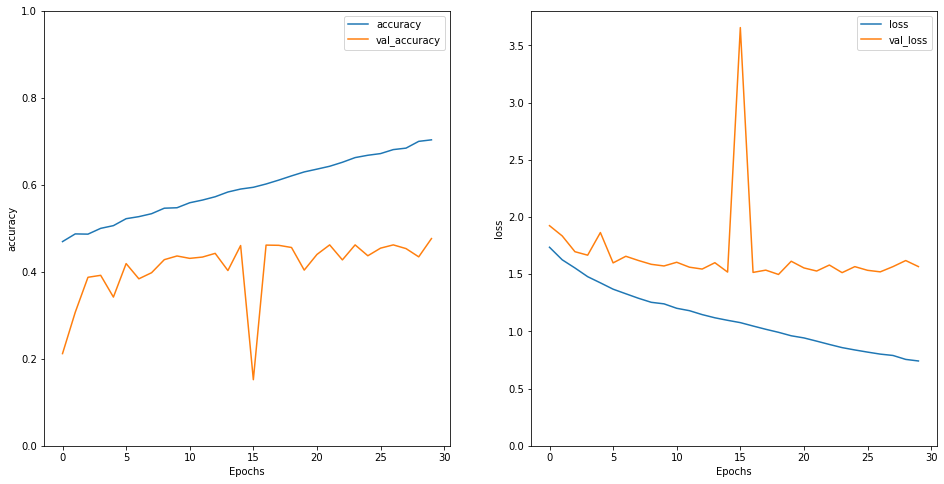

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1) 

plot_graphs(history, 'accuracy')
plt.ylim(0,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)

## Model_mobnet_1

Adapted from AIM website

Add Layers to base_model

In [ ]:
model_mobnet_1 = Sequential()
model_mobnet_1.add(base_model) 
model_mobnet_1.add(Flatten()) 
model_mobnet_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_mobnet_1.add(Dense(512,activation=('relu'))) 
model_mobnet_1.add(Dense(256,activation=('relu'))) 
model_mobnet_1.add(Dense(128,activation=('relu')))
model_mobnet_1.add(Dense(7,activation=('softmax')))

In [ ]:
model_mobnet_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1000)              4253864   
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1025024   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 9

Froze layers from the begining to 23rd to the last and carry their weights

In [ ]:
for layer in model_mobnet_1.layers[:-23]:
    layer.trainable = False

Add earlystop

In [ ]:
model_mobnet_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1 = model_mobnet_1.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=validate_batches,
            validation_steps=len(validate_batches),
            epochs=30,
            verbose=1
)

Epoch 1/30
208/208 [==============================] - 31s 150ms/step - loss: 0.7171 - accuracy: 0.7112 - val_loss: 1.8286 - val_accuracy: 0.4675
Epoch 2/30
208/208 [==============================] - 31s 148ms/step - loss: 0.6807 - accuracy: 0.7213 - val_loss: 1.5852 - val_accuracy: 0.4515
Epoch 3/30
208/208 [==============================] - 31s 147ms/step - loss: 0.6619 - accuracy: 0.7442 - val_loss: 1.6512 - val_accuracy: 0.4700
Epoch 4/30
208/208 [==============================] - 31s 147ms/step - loss: 0.6542 - accuracy: 0.7519 - val_loss: 1.7609 - val_accuracy: 0.4700
Epoch 5/30
208/208 [==============================] - 30s 146ms/step - loss: 0.6251 - accuracy: 0.7702 - val_loss: 1.6301 - val_accuracy: 0.4775
Epoch 6/30
208/208 [==============================] - 31s 147ms/step - loss: 0.6174 - accuracy: 0.7736 - val_loss: 1.7516 - val_accuracy: 0.4570
Epoch 7/30
208/208 [==============================] - 30s 146ms/step - loss: 0.6037 - accuracy: 0.7821 - val_loss: 1.6339 - val_ac

Model in test data

In [ ]:
train_loss, train_acc = model_mobnet_1.evaluate(train_batches)
val_loss, val_acc = model_mobnet_1.evaluate(validate_batches)

print('Train Loss: {}'.format(train_loss))
print('Train Accuracy: {}'.format(train_acc))
print('Validation Loss: {}'.format(val_loss))
print('Validation Accuracy: {}'.format(val_acc))


20/20 [==============================] - 2s 115ms/step - loss: 2.5420 - accuracy: 0.4705
Train Loss: 0.6018105149269104
Train Accuracy: 0.8293848037719727
Validation Loss: 2.5419559478759766
Validation Accuracy: 0.47049999237060547


Plot the accuracy and loss

(0.0, 3.042900651693344)

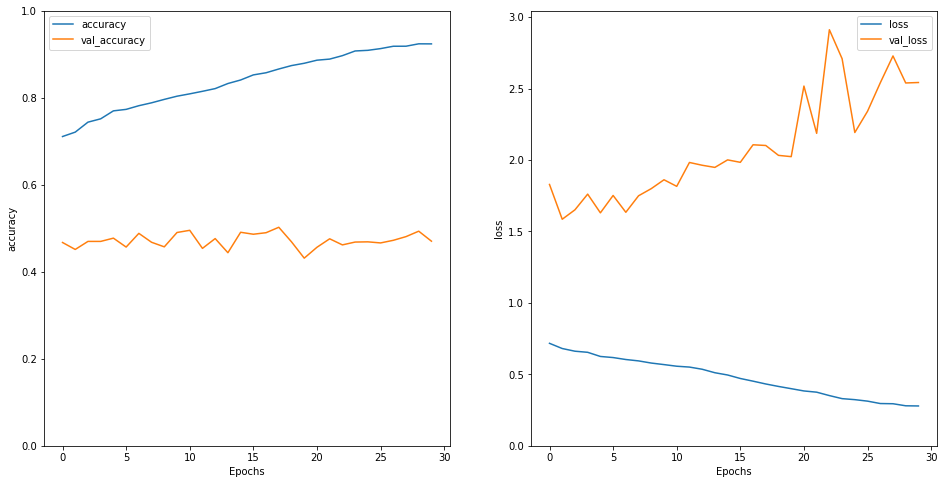

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1) 

plot_graphs(history_1, 'accuracy')
plt.ylim(0,1)
plt.subplot(1,2,2)
plot_graphs(history_1, 'loss')
plt.ylim(0,None)

## Model_mobnet_2

Modify the model from model_mobnet_1, and try do solve overfitting problems.

In [ ]:
model_mobnet_2 = Sequential()
model_mobnet_2.add(base_model) 
model_mobnet_2.add(Flatten()) 
model_mobnet_2.add(keras.layers.BatchNormalization())
model_mobnet_2.add(Dense(1024,activation=('relu'),kernel_regularizer=keras.regularizers.l2(alpha),input_dim=512))
model_mobnet_2.add(Dense(512,activation=('relu'))) 
model_mobnet_2.add(Dense(256,activation=('relu'))) 
model_mobnet_2.add(Dense(128,activation=('relu')))
model_mobnet_2.add(Dense(7,activation=('softmax')))


In [ ]:
model_mobnet_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1000)              4253864   
_________________________________________________________________
flatten_11 (Flatten)         (None, 1000)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 1000)              4000      
_________________________________________________________________
dense_51 (Dense)             (None, 1024)              1025024   
_________________________________________________________________
dense_52 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_54 (Dense)             (None, 128)             

In [ ]:
for layer in model_mobnet_2.layers[:-23]:
    layer.trainable = False

In [ ]:
model_mobnet_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_mobnet_2.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=validate_batches,
            validation_steps=len(validate_batches),
            epochs=30,
            callbacks=[checkpointer, earlystopper, reducer],
            verbose=1
)

Epoch 1/30
208/208 [==============================] - 120s 564ms/step - loss: 1.0950 - accuracy: 0.6335 - val_loss: 2.7129 - val_accuracy: 0.3025
INFO:tensorflow:Assets written to: MobileNet.h5_1/assets
Epoch 2/30
208/208 [==============================] - 118s 565ms/step - loss: 0.8582 - accuracy: 0.6947 - val_loss: 1.3411 - val_accuracy: 0.5345
INFO:tensorflow:Assets written to: MobileNet.h5_1/assets
Epoch 3/30
208/208 [==============================] - 116s 559ms/step - loss: 0.7557 - accuracy: 0.7311 - val_loss: 1.4679 - val_accuracy: 0.5225
INFO:tensorflow:Assets written to: MobileNet.h5_1/assets
Epoch 4/30
208/208 [==============================] - 116s 555ms/step - loss: 0.6727 - accuracy: 0.7610 - val_loss: 1.5702 - val_accuracy: 0.4920
INFO:tensorflow:Assets written to: MobileNet.h5_1/assets
Epoch 5/30
208/208 [==============================] - 116s 558ms/step - loss: 0.6225 - accuracy: 0.7888 - val_loss: 1.6011 - val_accuracy: 0.5050
INFO:tensorflow:Assets written to: MobileN

In [ ]:
train_loss, train_acc = model_mobnet_2.evaluate(train_batches)
val_loss, val_acc = model_mobnet_2.evaluate(validate_batches)

print('Train Loss: {}'.format(train_loss))
print('Train Accuracy: {}'.format(train_acc))
print('Validation Loss: {}'.format(val_loss))
print('Validation Accuracy: {}'.format(val_acc))

20/20 [==============================] - 2s 113ms/step - loss: 1.3411 - accuracy: 0.5345
Train Loss: 0.819038450717926
Train Accuracy: 0.7099155783653259
Validation Loss: 1.341144323348999
Validation Accuracy: 0.534500002861023


(0.0, 2.6966162040829658)

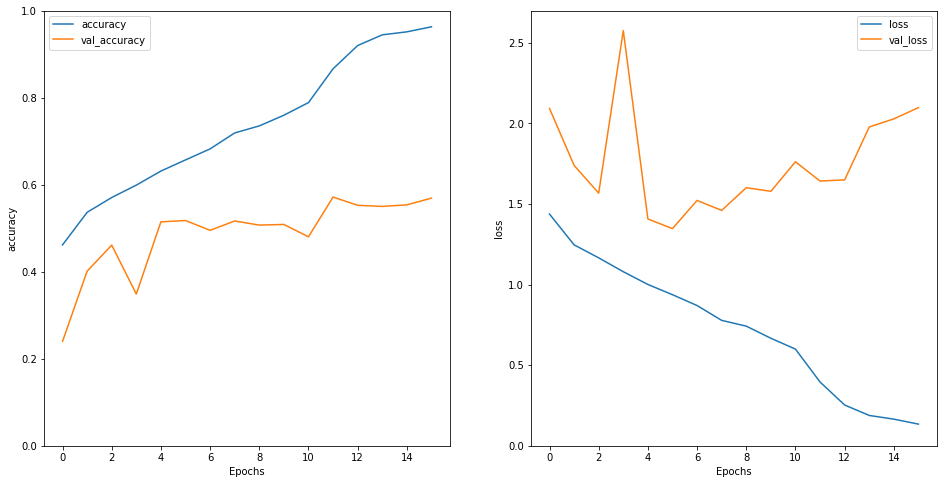

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1) 

plot_graphs(history_2, 'accuracy')
plt.ylim(0,1)
plt.subplot(1,2,2)
plot_graphs(history_2, 'loss')
plt.ylim(0,None)